In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\AJITESH\Desktop\Day-7\Housing_Loan_Approval_Dataset.csv")
df

,Applicant_ID,Income,Age,Credit_Score,Loan_Amount,Loan_Approved,House_Price_Index,Employment_Status,Marital_Status,Dependents,Loan_Term,Loan_Purpose
0,A0000,57450.71,49.0,666.0,NaN,1,274.37,Employed,Widowed,1,360.0,Education
1,A0001,47926.04,44.0,693.0,NaN,0,303.60,Employed,Widowed,unknown,240.0,Other
2,A0002,59715.33,36.0,660.0,129319.72,1,206.04,Self-employed,Married,0,300.0,Business
3,A0003,72845.45,29.0,685.0,244384.38,1,267.43,Self-employed,Married,3+,300.0,Other
4,A0004,46487.70,42.0,605.0,177827.66,1,NaN,Employed,Single,2,180.0,Education
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A0995,45783.50,46.0,NaN,151422.88,1,NaN,Unemployed,Married,3+,NaN,Home
996,A0996,76965.30,NaN,713.0,NaN,1,NaN,Self-employed,Divorced,1,240.0,Home
997,A0997,NaN,NaN,NaN,NaN,1,NaN,Employed,Divorced,0,120.0,Other
998,A0998,41432.32,33.0,717.0,232168.91,0,155.36,Self-employed,Widowed,1,240.0,Home


In [3]:
df.columns

Index(['Applicant_ID', 'Income', 'Age', 'Credit_Score', 'Loan_Amount',
       'Loan_Approved', 'House_Price_Index', 'Employment_Status',
       'Marital_Status', 'Dependents', 'Loan_Term', 'Loan_Purpose'],
      dtype='object')

In [4]:
df1 =df.copy()

In [5]:
df1.replace('Income', np.nan, inplace = True)
df1.replace('Age', np.nan, inplace = True)
df1.replace('Credit_Score', np.nan, inplace = True)
df1.replace('Loan_Amount', np.nan, inplace = True)
df1.replace('Loan_Term', np.nan, inplace = True)
df1.replace('House_Price_Index', np.nan, inplace = True)


In [6]:
df1.fillna(0,inplace = True)

In [7]:
df1

,Applicant_ID,Income,Age,Credit_Score,Loan_Amount,Loan_Approved,House_Price_Index,Employment_Status,Marital_Status,Dependents,Loan_Term,Loan_Purpose
0,A0000,57450.71,49.0,666.0,0.00,1,274.37,Employed,Widowed,1,360.0,Education
1,A0001,47926.04,44.0,693.0,0.00,0,303.60,Employed,Widowed,unknown,240.0,Other
2,A0002,59715.33,36.0,660.0,129319.72,1,206.04,Self-employed,Married,0,300.0,Business
3,A0003,72845.45,29.0,685.0,244384.38,1,267.43,Self-employed,Married,3+,300.0,Other
4,A0004,46487.70,42.0,605.0,177827.66,1,0.00,Employed,Single,2,180.0,Education
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A0995,45783.50,46.0,0.0,151422.88,1,0.00,Unemployed,Married,3+,0.0,Home
996,A0996,76965.30,0.0,713.0,0.00,1,0.00,Self-employed,Divorced,1,240.0,Home
997,A0997,0.00,0.0,0.0,0.00,1,0.00,Employed,Divorced,0,120.0,Other
998,A0998,41432.32,33.0,717.0,232168.91,0,155.36,Self-employed,Widowed,1,240.0,Home


In [8]:
df1.isnull().sum()

Applicant_ID         0
Income               0
Age                  0
Credit_Score         0
Loan_Amount          0
Loan_Approved        0
House_Price_Index    0
Employment_Status    0
Marital_Status       0
Dependents           0
Loan_Term            0
Loan_Purpose         0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       1000 non-null   object 
 1   Income             1000 non-null   float64
 2   Age                1000 non-null   float64
 3   Credit_Score       1000 non-null   float64
 4   Loan_Amount        1000 non-null   float64
 5   Loan_Approved      1000 non-null   int64  
 6   House_Price_Index  1000 non-null   float64
 7   Employment_Status  1000 non-null   object 
 8   Marital_Status     1000 non-null   object 
 9   Dependents         1000 non-null   object 
 10  Loan_Term          1000 non-null   float64
 11  Loan_Purpose       1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


In [10]:
x = df1[['Income', 'Age', 'Credit_Score', 'Loan_Amount']]
y = df1['House_Price_Index']


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state = 50)

In [12]:
linm = LinearRegression()

In [13]:
linm.fit(x_train,y_train)

LinearRegression()

In [14]:
yhat = linm.predict(x_test)

In [15]:
linm.coef_

array([ 1.56708484e-05, -1.33104917e-01,  1.09973389e-02, -1.25468776e-05])

In [16]:
linm.intercept_

195.65390570838284

In [17]:
Training_score = linm.score(x_train, y_train)
Training_score

0.0015375963086394773

In [18]:
Test_score = linm.score(x_test, y_test)
Test_score

-0.01815027846304096

In [19]:
x1 = df1[['Income', 'Age', 'Credit_Score', 'Loan_Amount']]
y1 = df1['Loan_Approved']

In [20]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.30, random_state = 50)

In [21]:
logm = LogisticRegression()

In [22]:
logm.fit(x1_train,y1_train)

LogisticRegression()

In [23]:
yhat1 = logm.predict(x1_test)

In [24]:
rsc = r2_score(y1_test,yhat)
rsc

-155253.16550758525

In [25]:
cm = confusion_matrix(y1_test,yhat1)
print(cm)

[[69 72]
 [86 73]]


In [26]:
clf = classification_report(y1_test, yhat1)
print(clf)

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       141
           1       0.50      0.46      0.48       159

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.48      0.47      0.47       300



In [27]:
x2 = df1[['Income', 'Age', 'Credit_Score', 'Loan_Amount']]
y2 = df1['Loan_Approved']

In [28]:
len(np.unique(y2))

2

In [29]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size = 0.30, random_state = 50)

In [30]:
svmm = svm.SVC()

In [31]:
svmm.fit(x2_train,y2_train)

SVC()

In [32]:
yhat2 = svmm.predict(x2_test)

In [33]:
cr2 = classification_report(y2_test, yhat2)
print(cr2)

              precision    recall  f1-score   support

           0       0.49      0.78      0.60       141
           1       0.60      0.29      0.39       159

    accuracy                           0.52       300
   macro avg       0.55      0.53      0.50       300
weighted avg       0.55      0.52      0.49       300



In [34]:
cm2 = confusion_matrix(y2_test, yhat2)
print(cm2)

[[110  31]
 [113  46]]


In [35]:
x3 = df1[['Income', 'Age', 'Credit_Score', 'Loan_Amount']]
y3 = df1['Loan_Approved']

In [36]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3, test_size = 0.30, random_state = 50)

In [37]:
dtc = DecisionTreeClassifier()

In [38]:
dtc.fit(x3_train, y3_train)

DecisionTreeClassifier()

In [39]:
yhat3 = dtc.predict(x3_test)

In [40]:
cm3 = confusion_matrix(y3_test, yhat3)
print(cm3)

[[66 75]
 [77 82]]


In [41]:
cr3 = classification_report(y3_test,yhat3)
print(cr3)

              precision    recall  f1-score   support

           0       0.46      0.47      0.46       141
           1       0.52      0.52      0.52       159

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



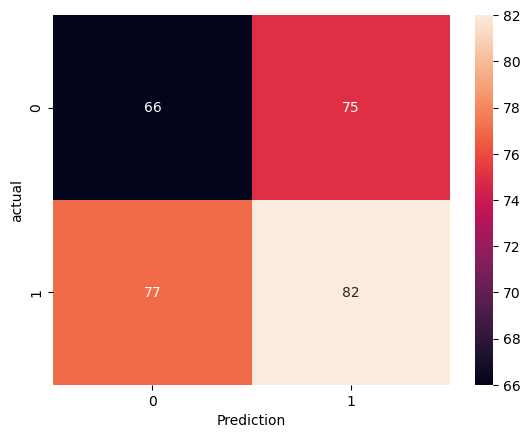

In [42]:
sns.heatmap(cm3, annot = True)
plt.xlabel('Prediction')
plt.ylabel('actual')
plt.show()

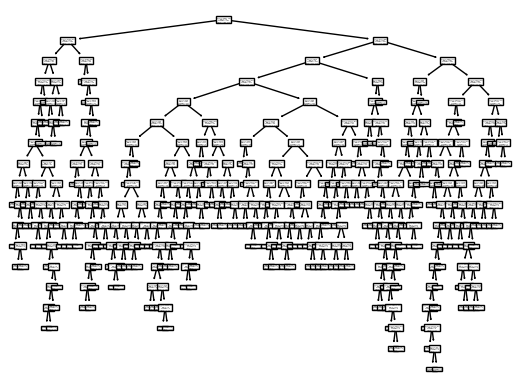

In [46]:
plot_tree(dtc)
plt.show()

In [48]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [50]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[10,15,20,None],
             'max_leaf_nodes':[100,150,200,None]}

In [52]:
grid = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 5, verbose = 1)

In [54]:
grid.fit(x3_train, y3_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'max_leaf_nodes': [100, 150, 200, None]},
             verbose=1)

In [56]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 100}

In [58]:
grid.best_score_

0.537142857142857

In [60]:
bestdtc = grid.best_estimator_

In [62]:
yhat4 = bestdtc.predict(x3_test)

In [66]:
clf4 = classification_report(y3_test, yhat4)
print(clf4)

              precision    recall  f1-score   support

           0       0.47      0.48      0.47       141
           1       0.53      0.51      0.52       159

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

